## Time Seriess Analysis in Python

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1.Correlation of two time series

Import data:

    - Dow Jones data
    
    - UFO Sightings

In [15]:
dji=pd.read_csv('./data/DJI.csv')

In [16]:
UFO=pd.read_csv('./data/UFO.csv')

In [17]:
dji.head()

,Date,Value
0,1941,110.96
1,1942,119.40
2,1943,135.89
3,1944,152.32
4,1945,192.91


In [18]:
#rename column
dji=dji.rename(columns={"Value": "DJI"})

In [19]:
UFO.head()

,Date,Value
0,1941,1
1,1942,2
2,1943,9
3,1944,9
4,1945,9


In [20]:
#rename column
UFO=UFO.rename(columns={"Value": "UFO"})

In [21]:
#join the data
stocks_and_ufo = dji.merge(UFO, how='inner', on='Date')

In [22]:
stocks_and_ufo

,Date,DJI,UFO
0,1941,110.96,1
1,1942,119.40,2
2,1943,135.89,9
3,1944,152.32,9
4,1945,192.91,9
...,...,...,...
68,2009,10428.05,4541
69,2010,11577.51,4283
70,2011,12217.56,5107
71,2012,13104.14,7357


In [23]:
stocks_and_ufo=stocks_and_ufo.set_index('Date')

In [24]:
stocks_and_ufo

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9
...,...,...
2009,10428.05,4541
2010,11577.51,4283
2011,12217.56,5107


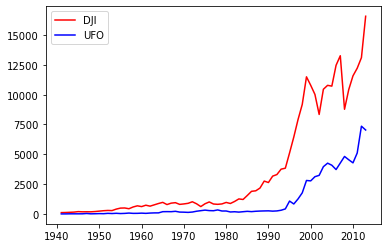

In [25]:
#plot Dow Jones data
plt.plot(stocks_and_ufo['DJI'], color = 'red', label = 'DJI')
#plot UFO
plt.plot(stocks_and_ufo['UFO'], color = 'blue',label = 'UFO')
plt.legend()
plt.show()

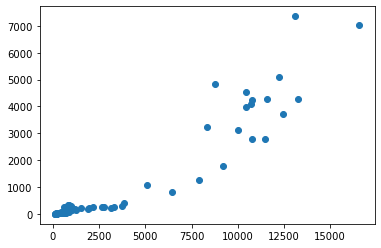

In [26]:
#scatter plot
plt.scatter(stocks_and_ufo['DJI'], stocks_and_ufo['UFO'])
plt.show()

In [27]:
# Compute the correlation
correlation1 = stocks_and_ufo['DJI'].corr(stocks_and_ufo['UFO'])
print("Correlation: ", correlation1)

Correlation:  0.9399762210726428


In [28]:
# Compute correlation of percent changes
stocks_and_ufo['DJI_per'] = stocks_and_ufo['DJI'].pct_change()
stocks_and_ufo

,DJI,UFO,DJI_per
Date,,,
1941,110.96,1,NaN
1942,119.40,2,0.076063
1943,135.89,9,0.138107
1944,152.32,9,0.120907
1945,192.91,9,0.266478
...,...,...,...
2009,10428.05,4541,0.188194
2010,11577.51,4283,0.110228
2011,12217.56,5107,0.055284


In [29]:
stocks_and_ufo['UFO_per'] = stocks_and_ufo['UFO'].pct_change()
stocks_and_ufo

,DJI,UFO,DJI_per,UFO_per
Date,,,,
1941,110.96,1,NaN,NaN
1942,119.40,2,0.076063,1.000000
1943,135.89,9,0.138107,3.500000
1944,152.32,9,0.120907,0.000000
1945,192.91,9,0.266478,0.000000
...,...,...,...,...
2009,10428.05,4541,0.188194,-0.057884
2010,11577.51,4283,0.110228,-0.056816
2011,12217.56,5107,0.055284,0.192389


In [30]:
correlation2 = stocks_and_ufo['UFO_per'].corr(stocks_and_ufo['DJI_per'])
print("Correlation of percent changes: ", correlation2)

Correlation of percent changes:  0.06026935462405373


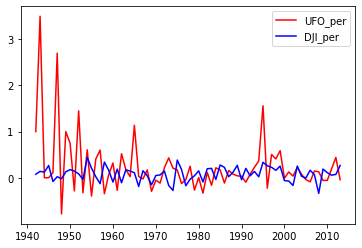

In [41]:
#plot Dow Jones data
plt.plot(stocks_and_ufo['UFO_per'], color = 'red', label = 'UFO_per')
#plot UFO
plt.plot(stocks_and_ufo['DJI_per'], color = 'blue',label = 'DJI_per')
plt.legend()
plt.show()

**Common Mistake**: Correlation of Two Trending Series

Consider two time series that are both trending. Even if the two series are totally unrelated, you could still get a very high correlation. That's why, in financial world, when you look at the correlation of say, two stocks, you should look at the correlation of their **returns**, not their levels. 

#### 2.Simple linear regressions of time series

What is a Regression?

A simple linear regression finds the slope, beta, and intercept, alpha, of a line that's the best fit between a dependent variable, y, and an independent variable, x. 

The x and y can be two time series.


A linear regression is also known as **Ordinary Least Squares**, or OLS, because it minimizes the sum of the squared distances between the data points and the regression line.

In [31]:
#1.import 2 time series financial datasets - 'AMZN' and 'MSFT'
#2.rename
#3.join
#4.change index
x=pd.read_csv('./data/AMZN.csv')
y=pd.read_csv('./data/MSFT.csv')

In [32]:
x.head()

,Date,Adj Close
0,5/15/1997,1.958333
1,5/16/1997,1.729167
2,5/19/1997,1.708333
3,5/20/1997,1.635417
4,5/21/1997,1.427083


In [33]:
y.head()

,Date,Adj Close
0,8/6/2012,26.107651
1,8/7/2012,26.377876
2,8/8/2012,26.438896
3,8/9/2012,26.587088
4,8/10/2012,26.517351


In [34]:
x=x.rename(columns={"Adj Close": "AMZN"})

In [35]:
y=y.rename(columns={"Adj Close": "MSFT"})

In [36]:
df = x.merge(y, how='inner', on='Date')

In [37]:
df.shape

(1256, 3)

In [38]:
df=df.set_index('Date')

In [39]:
df

,AMZN,MSFT
Date,,
8/6/2012,233.990005,26.107651
8/7/2012,236.559998,26.377876
8/8/2012,234.380005,26.438896
8/9/2012,234.059998,26.587088
8/10/2012,232.750000,26.517351
...,...,...
7/27/2017,1046.000000,73.160004
7/28/2017,1020.039978,73.040001
7/31/2017,987.780029,72.699997


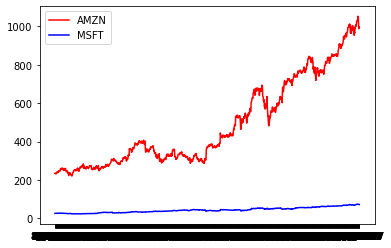

In [40]:
#plot Dow Jones data
plt.plot(df['AMZN'], color = 'red', label = 'AMZN')
#plot UFO
plt.plot(df['MSFT'], color = 'blue',label = 'MSFT')
plt.legend()
plt.show()

Let's **regress** the returns of MSFT **on** the returns of AMZN
 - so MSFT's return is y, AMZN's return is x

In [68]:
# Import the statsmodels module
import statsmodels.api as sm

In [106]:
# Compute percentage changes in both series
df['MSFT_per'] = df['MSFT'].pct_change()
df['AMZN_per'] = df['AMZN'].pct_change()

In [96]:
df

,AMZN,MSFT,MSFT_per,AMZN_per
Date,,,,
8/6/2012,233.990005,26.107651,NaN,NaN
8/7/2012,236.559998,26.377876,0.010350,0.010983
8/8/2012,234.380005,26.438896,0.002313,-0.009215
8/9/2012,234.059998,26.587088,0.005605,-0.001365
8/10/2012,232.750000,26.517351,-0.002623,-0.005597
...,...,...,...,...
7/27/2017,1046.000000,73.160004,-0.012019,-0.006459
7/28/2017,1020.039978,73.040001,-0.001640,-0.024818
7/31/2017,987.780029,72.699997,-0.004655,-0.031626


- drop the first row

Notice that the first row of the return series is NaN. Each return is computed from two prices, so there is one less return than price. To delete the first row of NaN's, use the pandas method "dropna".

In [97]:
df = df.dropna()

In [98]:
df

,AMZN,MSFT,MSFT_per,AMZN_per
Date,,,,
8/7/2012,236.559998,26.377876,0.010350,0.010983
8/8/2012,234.380005,26.438896,0.002313,-0.009215
8/9/2012,234.059998,26.587088,0.005605,-0.001365
8/10/2012,232.750000,26.517351,-0.002623,-0.005597
8/13/2012,232.440002,26.491201,-0.000986,-0.001332
...,...,...,...,...
7/27/2017,1046.000000,73.160004,-0.012019,-0.006459
7/28/2017,1020.039978,73.040001,-0.001640,-0.024818
7/31/2017,987.780029,72.699997,-0.004655,-0.031626


- Create a constant

You need to add a column of ones as a dependent, right hand side variable. The reason you have to do this is because the regression function assumes that if there is no constant column, then you want to run the regression without an intercept. By adding a column of ones, statsmodels will compute the regression coefficient of that column as well, which can be interpreted as the intercept of the line. The statsmodels method "add constant" is a simple way to add a constant.

In [99]:
df = sm.add_constant(df)
df

,const,AMZN,MSFT,MSFT_per,AMZN_per
Date,,,,,
8/7/2012,1.0,236.559998,26.377876,0.010350,0.010983
8/8/2012,1.0,234.380005,26.438896,0.002313,-0.009215
8/9/2012,1.0,234.059998,26.587088,0.005605,-0.001365
8/10/2012,1.0,232.750000,26.517351,-0.002623,-0.005597
8/13/2012,1.0,232.440002,26.491201,-0.000986,-0.001332
...,...,...,...,...,...
7/27/2017,1.0,1046.000000,73.160004,-0.012019,-0.006459
7/28/2017,1.0,1020.039978,73.040001,-0.001640,-0.024818
7/31/2017,1.0,987.780029,72.699997,-0.004655,-0.031626


- Run regression

The first argument of the statsmodel regression is the series that represents the dependent variable, y, and the next argument contains the independent variable or variables. In this case, the dependent variable is MSFT_per's return and the independent variables are the constant and AMZN_per's return. The method "fit" runs the regression and results are saved in a class instance called results.

In [104]:
# Regress y on dfx1
result = sm.OLS(df['MSFT_per'],df[['const','AMZN_per']]).fit()

In [105]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MSFT_per   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     208.8
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           6.99e-44
Time:                        18:10:07   Log-Likelihood:                 3656.5
No. Observations:                1255   AIC:                            -7309.
Df Residuals:                    1253   BIC:                            -7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.410      0.1

In [115]:
intercept=result.params[0]
print(intercept)
slope=result.params[1]
print(slope)

0.0005247197315760164
0.29329774045160534


- the coefficent is the slope of the regression, which is also referred to as beta
- The R-squared measures how well the linear regression line fits the data
- The magnitude of the correlation is the square root of the R-squared
- And the sign of the correlation is the sign of the slope of the regression line

In [108]:
#correlation
correlation = df['AMZN_per'].corr(df['MSFT_per'])
print("Correlation of percent changes: ", correlation)

Correlation of percent changes:  0.3777380948824798


In [111]:
#square root of the R-squared
np.sqrt(0.143)

0.3781534080237807